# 1. Install Dependencies and Setup

In [1]:
!pip install tensorflow opencv-python matplotlib

In [2]:
!pip list

Package                       Version
----------------------------- ---------------
absl-py                       1.4.0
aiobotocore                   2.4.2
aiohttp                       3.8.4
aioitertools                  0.11.0
aiosignal                     1.3.1
alabaster                     0.7.12
anaconda-client               1.11.2
anaconda-navigator            2.4.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
backport

ruamel-yaml-conda             0.17.21
s3fs                          2022.11.0
scikit-image                  0.19.3
scikit-learn                  1.2.2
scikit-learn-intelex          20230228.214242
scipy                         1.10.1
Scrapy                        2.8.0
seaborn                       0.12.2
SecretStorage                 3.3.1
Send2Trash                    1.8.0
service-identity              18.1.0
setuptools                    67.8.0
sip                           6.6.2
six                           1.16.0
smart-open                    5.2.1
sniffio                       1.2.0
snowballstemmer               2.2.0
sortedcontainers              2.4.0
soupsieve                     2.3.2.post1
Sphinx                        5.0.2
sphinxcontrib-applehelp       1.0.2
sphinxcontrib-devhelp         1.0.2
sphinxcontrib-htmlhelp        2.0.0
sphinxcontrib-jsmath          1.0.1
sphinxcontrib-qthelp          1.0.3
sphinxcontrib-serializinghtml 1.1.5
spyder                        5.4.1


In [3]:
import tensorflow as tf
import os

2023-06-09 00:21:18.071829: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-09 00:21:18.380046: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-09 00:21:18.381142: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-09 00:21:20.355941: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# 2. Remove corrupt images (if any)

In [4]:
import cv2
import imghdr

In [5]:
data_dir = 'data' 

In [6]:
# define valid image extensions:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [7]:
# check that the image extension is valid otherwise raise Exception:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [9]:
# build a dataset from the images
data = tf.keras.utils.image_dataset_from_directory('data')

Found 5856 files belonging to 2 classes.


2023-06-09 00:22:37.523814: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [10]:
# define iterator on the data:
data_iterator = data.as_numpy_iterator()

2023-06-09 00:22:37.635771: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [5856]
	 [[{{node Placeholder/_4}}]]
2023-06-09 00:22:37.637296: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [5856]
	 [[{{node Placeholder/_4}}]]


In [11]:
batch = data_iterator.next()

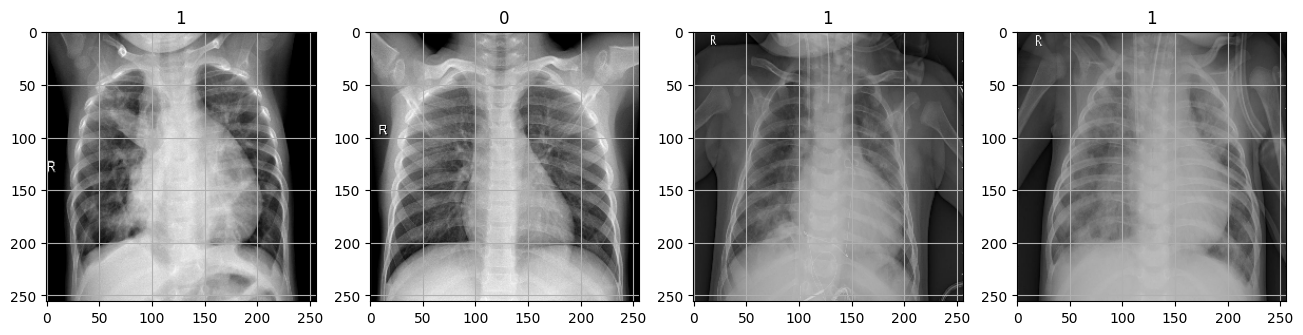

In [12]:
fig, ax = plt.subplots(ncols=4, figsize=(16,16))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
    ax[idx].grid()

# 4. Scale Data

In [13]:
data = data.map(lambda x,y: (x/255, y))

In [14]:
data.as_numpy_iterator().next()

2023-06-09 00:22:39.744942: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [5856]
	 [[{{node Placeholder/_4}}]]
2023-06-09 00:22:39.745541: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [5856]
	 [[{{node Placeholder/_4}}]]


(array([[[[0.1651348 , 0.1651348 , 0.1651348 ],
          [0.18965226, 0.18965226, 0.18965226],
          [0.19711244, 0.19711244, 0.19711244],
          ...,
          [0.11372549, 0.11372549, 0.11372549],
          [0.10196079, 0.10196079, 0.10196079],
          [0.09803922, 0.09803922, 0.09803922]],
 
         [[0.17444853, 0.17444853, 0.17444853],
          [0.19415595, 0.19415595, 0.19415595],
          [0.2014476 , 0.2014476 , 0.2014476 ],
          ...,
          [0.11372549, 0.11372549, 0.11372549],
          [0.10196079, 0.10196079, 0.10196079],
          [0.09803922, 0.09803922, 0.09803922]],
 
         [[0.17519148, 0.17519148, 0.17519148],
          [0.18658088, 0.18658088, 0.18658088],
          [0.20978095, 0.20978095, 0.20978095],
          ...,
          [0.11372549, 0.11372549, 0.11372549],
          [0.10196079, 0.10196079, 0.10196079],
          [0.09803922, 0.09803922, 0.09803922]],
 
         ...,
 
         [[0.23479626, 0.23479626, 0.23479626],
          [0.26678

# 5. Split Data

In [15]:
train_size = int(len(data)*.65)
val_size = int(len(data)*.15)
test_size = int(len(data)*.2)

In [16]:
train_size

118

In [17]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [18]:
# print the batch labels:
iterator = train.__iter__()
next_elem = iterator.get_next()
cases = next_elem[1]
print(cases.numpy())

2023-06-09 00:22:41.082301: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [5856]
	 [[{{node Placeholder/_4}}]]
2023-06-09 00:22:41.083334: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [5856]
	 [[{{node Placeholder/_4}}]]


[1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1]


# 6. Build Deep Learning Model

In [19]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [21]:
model = Sequential()

In [22]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(Dropout(0.1))
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.1))
#model.add(Conv2D(16, (3,3), 1, activation='relu'))
#model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [23]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 127, 127, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 62, 62, 32)        0

# 7. Train

In [25]:
logdir='logs'

In [26]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [27]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
118/118 [==============================] - ETA: 0s - loss: 0.8365 - accuracy: 0.8162

2023-06-09 00:26:06.591901: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [5856]
	 [[{{node Placeholder/_4}}]]
2023-06-09 00:26:06.592331: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [5856]
	 [[{{node Placeholder/_4}}]]


118/118 [==============================] - 226s 2s/step - loss: 0.8365 - accuracy: 0.8162 - val_loss: 0.1520 - val_accuracy: 0.9398
Epoch 2/10
118/118 [==============================] - 199s 2s/step - loss: 0.1586 - accuracy: 0.9394 - val_loss: 0.1290 - val_accuracy: 0.9525
Epoch 3/10
118/118 [==============================] - 202s 2s/step - loss: 0.1135 - accuracy: 0.9568 - val_loss: 0.1216 - val_accuracy: 0.9560
Epoch 4/10
118/118 [==============================] - 198s 2s/step - loss: 0.0917 - accuracy: 0.9695 - val_loss: 0.1336 - val_accuracy: 0.9525
Epoch 5/10
118/118 [==============================] - 205s 2s/step - loss: 0.0637 - accuracy: 0.9796 - val_loss: 0.1240 - val_accuracy: 0.9583
Epoch 6/10
118/118 [==============================] - 225s 2s/step - loss: 0.0658 - accuracy: 0.9778 - val_loss: 0.1869 - val_accuracy: 0.9398
Epoch 7/10
118/118 [==============================] - 201s 2s/step - loss: 0.0866 - accuracy: 0.9701 - val_loss: 0.1107 - val_accuracy: 0.9618
Epoch 8/10

# 8. Plot Performance

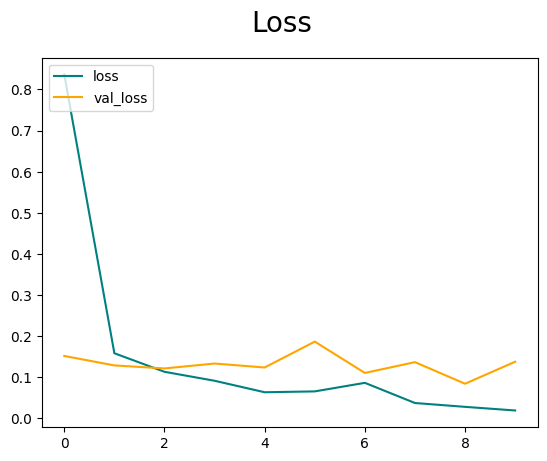

In [28]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

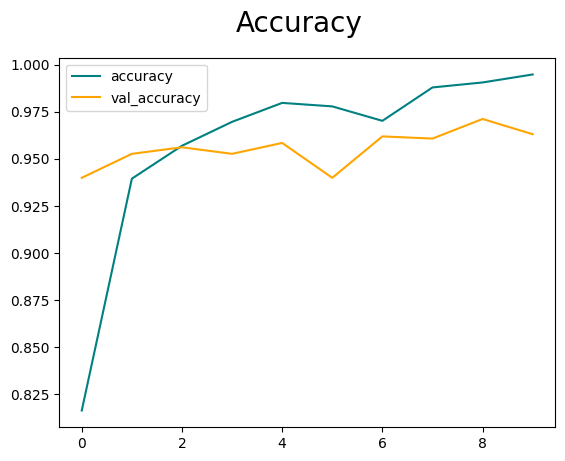

In [29]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [30]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [31]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [32]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

2023-06-09 00:58:09.502844: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [5856]
	 [[{{node Placeholder/_4}}]]
2023-06-09 00:58:09.503906: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [5856]
	 [[{{node Placeholder/_4}}]]


1/1 [==============================] - 0s 288ms/step


In [33]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.95995426, shape=(), dtype=float32) tf.Tensor(0.9677047, shape=(), dtype=float32) tf.Tensor(0.9453125, shape=(), dtype=float32)


# 10. Test

In [46]:
import cv2

In [61]:
# normal case 
img = cv2.imread('test-normal.jpg')

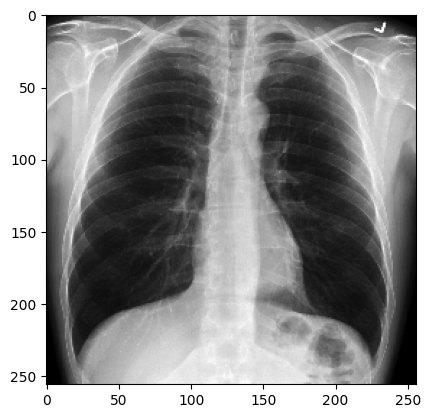

In [62]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [63]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 42ms/step


In [64]:
yhat

array([[0.02843979]], dtype=float32)

In [65]:
if yhat > 0.5: 
    print(f'Predicted class is Pneumonia')
else:
    print(f'Predicted class is Normal')

Predicted class is Normal


In [66]:
# pneumonia case
img = cv2.imread('test-pneumonia.jpg')

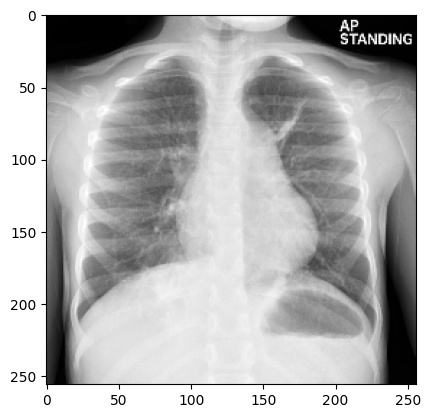

In [67]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [68]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 39ms/step


In [69]:
yhat

array([[1.]], dtype=float32)

In [70]:
if yhat > 0.5: 
    print(f'Predicted class is Pneumonia')
else:
    print(f'Predicted class is Normal')

Predicted class is Pneumonia


# 11. Save the Model

In [71]:
from tensorflow.keras.models import load_model

In [72]:
model.save(os.path.join('models','imageclassifier.h5'))

In [73]:
new_model = load_model('models/imageclassifier.h5')

In [74]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 75ms/step


array([[1.]], dtype=float32)